In [126]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lars

Number of positive/negative examples:

 495 505
Data mean positive class:  [ 0.55964723  0.26867115  0.01491576 -0.00258761]
Data mean negative class:  [-0.57095324 -0.27409885 -0.01521709  0.00263989]


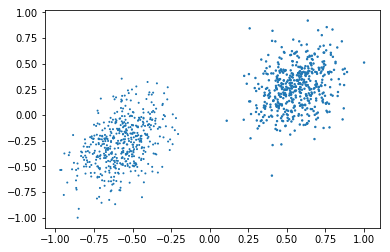

In [ ]:
y = np.random.randint(low=0, high=2, size=1000)
X = 0.25*np.random.randn(4*y.size).reshape(4, y.size)
# induce class membership into first two components
X[0, :] += 2*y - 1
X[1, :] = 0.25*X[0, :] + 0.75*X[1, :]
# ...and some normalization
X -= np.mean(X, axis=1)[:, np.newaxis]
X /= np.std(np.abs(X), axis=1)[:, np.newaxis]
print('Number of positive/negative examples:', np.sum(y==0), np.sum(y==1))
print('Data mean positive class: ', np.mean(X[:,y==1], axis=1))
print('Data mean negative class: ', np.mean(X[:,y==0], axis=1))
plt.scatter(X[0, :], X[1, :], y+1)

Problem-centric, model-based explanation: [[ 0.82871122  0.66661931  0.05289172 -0.00511387]]
Problem-centric, instance-based explanation for x_5: [[ -4.17034565e-01  -9.30474286e-02  -1.96516557e-03  -1.09940677e-04]]
Method-centric, model-based explanation: [[ 0.82871122  0.          0.          0.        ]]
Method-centric, instance-based explanation for x_5: [[-0.41703456 -0.         -0.          0.        ]]


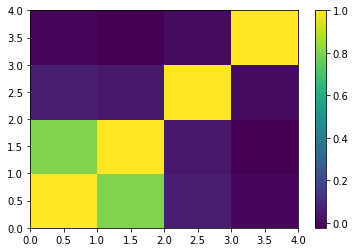

In [226]:
f = Lars(n_nonzero_coefs=1, fit_intercept=False, fit_path=False, normalize=False)
f.fit(X.T, y)
w = f.coef_
C = np.corrcoef(X)
plt.pcolor(np.corrcoef(X))
plt.colorbar()
print('Problem-centric, model-based explanation:', w.dot(C))
print('Problem-centric, instance-based explanation for x_5:', w.dot(C)*X[:,5])
print('Method-centric, model-based explanation:', w)
print('Method-centric, instance-based explanation for x_5:', w*X[:,5])

Number of positive/negative predictions:  497 503
[[ 274.3542021   129.40883383    4.16940005   -4.41790071]]


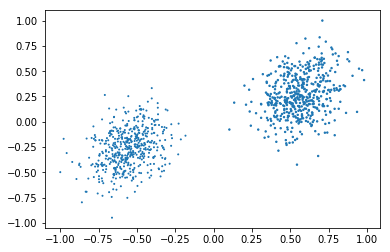

In [228]:
yt = np.random.randint(low=0, high=2, size=1000)
Xt = 0.25*np.random.randn(4*yt.size).reshape(4, yt.size)
# induce class membership into first two components
Xt[0, :] += 2*yt - 1
Xt[1, :] = 0.25*Xt[0, :] + 0.75*Xt[1, :]
# ...and some normalization
Xt -= np.mean(Xt, axis=1)[:, np.newaxis]
Xt /= np.max(np.abs(Xt), axis=1)[:, np.newaxis]
scores = f.predict(Xt.T)
print('Number of positive/negative predictions: ', np.sum(scores>=0), np.sum(scores<0))
print(scores.T.dot(Xt.T))
plt.scatter(Xt[0, :], Xt[1, :], yt+1)

Number of positive/negative predictions:  499 501
[[ 276.90036554   -3.71305287   -2.17099419    5.16830032]]


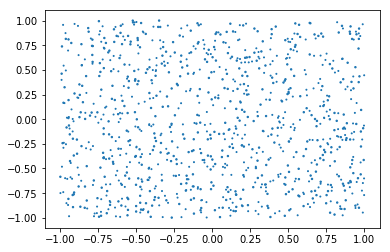

In [227]:
Xt = 2*np.random.rand(4, 1000) - 1
scores = f.predict(Xt.T)
print('Number of positive/negative predictions: ', np.sum(scores>=0), np.sum(scores<0))
print(scores.T.dot(Xt.T))
plt.scatter(Xt[0, :], Xt[1, :], yt+1)